First we'll import the necessary library for this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

Importing the excel. Since our Coffee.xlsx has three sheet. So, we have to read data from each sheet.

In [2]:
sheet_one_data = pd.read_excel('Raw_data/Coffee.xlsx',engine='openpyxl',sheet_name='orders')
sheet_two_data = pd.read_excel('Raw_data/Coffee.xlsx', engine='openpyxl',sheet_name='customers')
sheet_three_data = pd.read_excel('Raw_data/Coffee.xlsx', engine='openpyxl',sheet_name='products')

Collecting the necessary info from sheet one.

In [3]:
#Extracting first four data from sheet one
sheet_one_data.head()


,Order ID,Order Date,Customer ID,Product ID,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
0,QEV-37451-860,2019-09-05,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QEV-37451-860,2019-09-05,17670-51384-MA,E-M-0.5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Getting information about the columns
sheet_one_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1000 non-null   object        
 1   Order Date     1000 non-null   datetime64[ns]
 2   Customer ID    1000 non-null   object        
 3   Product ID     1000 non-null   object        
 4   Quantity       1000 non-null   int64         
 5   Customer Name  0 non-null      float64       
 6   Email          0 non-null      float64       
 7   Country        0 non-null      float64       
 8   Coffee Type    0 non-null      float64       
 9   Roast Type     0 non-null      float64       
 10  Size           0 non-null      float64       
 11  Unit Price     0 non-null      float64       
 12  Sales          0 non-null      float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(3)
memory usage: 101.7+ KB


In [5]:
# Describing the each columns like getting mean median
sheet_one_data.describe()

,Order Date,Quantity,Customer Name,Email,Country,Coffee Type,Roast Type,Size,Unit Price,Sales
count,1000,1000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2020-11-06 21:07:12,3.551000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2019-01-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2019-12-17 00:00:00,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2020-12-02 12:00:00,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021-10-02 06:00:00,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022-08-19 00:00:00,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.681733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Shape of the first sheet
sheet_one_data.shape

(1000, 13)

In [7]:
#Finding the empty values 
print(sheet_one_data.duplicated().sum())

0


In [8]:
#Finding the duplicate values
print(sheet_one_data.notna().sum())

Order ID         1000
Order Date       1000
Customer ID      1000
Product ID       1000
Quantity         1000
Customer Name       0
Email               0
Country             0
Coffee Type         0
Roast Type          0
Size                0
Unit Price          0
Sales               0
dtype: int64


Doing same with other remaning two sheets

In [9]:
sheet_two_data.head()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [10]:
sheet_two_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   object
 1   Customer Name   1000 non-null   object
 2   Email           796 non-null    object
 3   Phone Number    870 non-null    object
 4   Address Line 1  1000 non-null   object
 5   City            1000 non-null   object
 6   Country         1000 non-null   object
 7   Postcode        1000 non-null   object
 8   Loyalty Card    1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [11]:
sheet_two_data.describe()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
count,1000,1000,796,870,1000,1000,1000,1000,1000
unique,1000,1000,796,870,1000,386,3,629,2
top,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Washington,United States,D04,No
freq,1,1,1,1,1,27,782,12,513


In [12]:
sheet_two_data.shape

(1000, 9)

In [13]:
print(sheet_two_data.duplicated().sum())

0


In [14]:
print(sheet_two_data.notna().sum())

Customer ID       1000
Customer Name     1000
Email              796
Phone Number       870
Address Line 1    1000
City              1000
Country           1000
Postcode          1000
Loyalty Card      1000
dtype: int64




Now last sheet

In [15]:
sheet_three_data.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


In [16]:
sheet_three_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      48 non-null     object 
 1   Coffee Type     48 non-null     object 
 2   Roast Type      48 non-null     object 
 3   Size            48 non-null     float64
 4   Unit Price      48 non-null     float64
 5   Price per 100g  48 non-null     float64
 6   Profit          48 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.8+ KB


In [17]:
sheet_three_data.describe()

,Size,Unit Price,Price per 100g,Profit
count,48.000000,48.000000,48.000000,48.000000
mean,1.050000,13.046250,1.435087,1.316219
std,0.893951,9.953578,0.371981,1.161426
min,0.200000,2.685000,0.823400,0.161100
25%,0.425000,5.216250,1.191400,0.501300
50%,0.750000,9.230000,1.370600,0.943800
75%,1.375000,17.033750,1.659375,1.657700
max,2.500000,36.455000,2.377500,4.739150


In [18]:
sheet_three_data.shape

(48, 7)

In [19]:
print(sheet_three_data.duplicated().sum())

0


In [20]:
print(sheet_three_data.notna().sum())

Product ID        48
Coffee Type       48
Roast Type        48
Size              48
Unit Price        48
Price per 100g    48
Profit            48
dtype: int64


Form above code we found out that sheet one need to be filled from the data from sheet two and sheet three. Order ID and Customer ID is connecting the the sheets. And we can see that there is no empty or duplicate value in third sheet. It consists information about the product like cost,size,price,roast type.
Abbreviation is used we will change it later so it will be easier to read.

In second sheet we can see that the there are empty values in email and phone number. And those empty values doesn't cause that much of a problem becasue some customers don't provide such data. And there are no problems in second sheet right now. 

As per the first sheet it need to be filled using second and third sheets. And there's no problem there as well.

Now we gonna fill empty value with N/A. Because email and phone number isn't important data in our current situation.

In [ ]:
sheet_two_data['Email'].fillna('N/A',inplace=True)
sheet_two_data['Phone Number'].fillna('N/A', inplace=True)
#Checking the empty value
sheet_two_data.notna().sum()

Customer ID       1000
Customer Name     1000
Email             1000
Phone Number      1000
Address Line 1    1000
City              1000
Country           1000
Postcode          1000
Loyalty Card      1000
dtype: int64

Now we transform the data in third sheet. We can see that abbreviation is used for roast type and coffee type. We gonna use the full word for better understanding of the data.

In [34]:
coffee_type = {
    'Ara':'Arabica',
    'Rob':'Robusta',
    'Lib':'Liberica',
    'Exc':'Excelsa'
}

sheet_three_data['Coffee Type'].replace(coffee_type, inplace=True)

roast_type = {
    'L':'Light',
    'M':'Medium',
    'D':'Dark'
}

sheet_three_data['Roast Type'].replace(roast_type, inplace=True)
sheet_three_data.head()



,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Arabica,Light,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Arabica,Light,0.5,7.770,1.5540,0.69930
2,A-L-1,Arabica,Light,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Arabica,Light,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Arabica,Medium,0.2,3.375,1.6875,0.30375


Checking if abbreviation exist in countries or not 

In [32]:
print(sheet_two_data['Country'].unique())

['United States' 'Ireland' 'United Kingdom']


As we can see above that there is no outlier. But we are visualize it using seaborn and matplotlib. So, it is easier to understand.

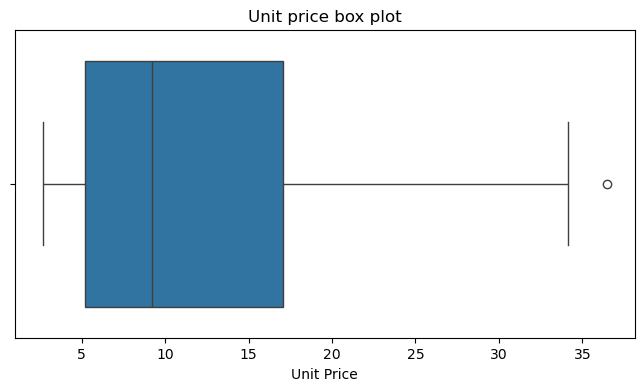

In [42]:
#Visualizing the Unit Price
plt.figure(figsize=(8,4))
sns.boxplot(x=sheet_three_data['Unit Price'])
plt.title('Unit price box plot')
plt.show()

In above Unit price box plot we can see an outlier. But this is not an error or a bad thing. Because it is real product as we can see it in `sheet_three_data.describe()` output. The maximum value is 36.45 So, it is normal.

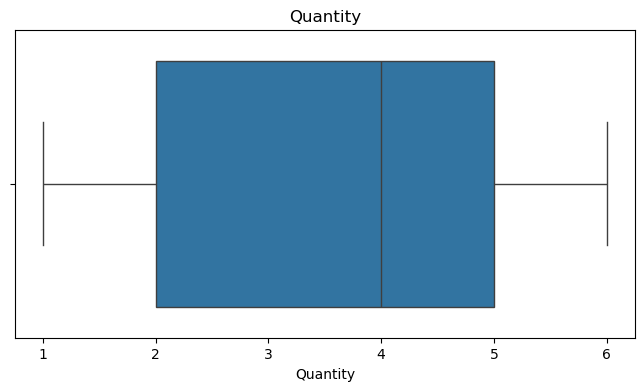

In [47]:
#Visualizing the Quantity 
plt.figure(figsize=(8,4))
sns.boxplot(x=sheet_one_data['Quantity'])
plt.title('Quantity')
plt.show()